In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('B:\BOSTON UNI\Acad\TDS\datasets\Building and Property Violations.csv') #change path
data.head(n=15)

,_id,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,1,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,2,V819834,1013,2025-02-26 09:28:30,Closed,105.6,NaN,Suspension or Revocation,16,NaN,...,21,36 Montgomery St,NaN,Cambridge,MA,02140,84736.0,42.342090,-71.149631,"(42.342089642057466, -71.14963068840655)"
2,3,V819607,1013,2025-02-25 09:57:22,Open,116,NaN,Unsafe Structures,548,NaN,...,06,548 E Broadway,NaN,South Boston,MA,02127,21002.0,42.335680,-71.042280,"(42.3356795004986, -71.04228046176141)"
3,4,V818461,1013,2025-02-24 11:48:53,Open,102.8,NaN,Maintenance,3,NaN,...,22,4 Nichols Street,NaN,Southborough,MA,01772,71083.0,42.358660,-71.128011,"(42.35865961011559, -71.12801060229314)"
4,5,V818415,1013,2025-02-24 09:22:55,Open,102.8,NaN,Maintenance,194,NaN,...,07,194 West Ninth,NaN,South Boston,MA,02127,102876.0,42.333420,-71.052550,"(42.33341951399546, -71.05255048984614)"
5,6,V818410,1013,2025-02-24 09:10:37,Open,102.8,NaN,Maintenance,149,NaN,...,01,149 Saratoga St,NaN,East Boston,MA,02128,122509.0,42.377064,-71.034734,"(42.37706448915747, -71.0347343517526)"
6,7,V818406,1013,2025-02-24 08:54:03,Open,102.8,NaN,Maintenance,151,NaN,...,01,50 Franklin St,Suite 400,Boston,MA,02110,122511.0,42.377084,-71.034670,"(42.37708448850359, -71.03467035241974)"
7,8,V818402,1013,2025-02-24 08:44:58,Open,105.1,NaN,Failure to Obtain Permit,47,NaN,...,03,3 Newton Executive Park,Suite 106,Newton,MA,02462,119785.0,42.359840,-71.066090,"(42.35983953029, -71.06609046067989)"
8,9,V818397,1013,2025-02-24 08:27:14,Open,104.6,NaN,Right of Entry,44,NaN,...,21,44 Pratt St,NaN,Allston,MA,02134,112516.0,42.355380,-71.127531,"(42.35537961026286, -71.12753060848918)"
9,10,V817736,1013,2025-02-21 09:22:05,Open,1001.3.2,NaN,Testing & Certification,4,NaN,...,05,4 Gloucester St,NaN,Boston,MA,02115,64950.0,42.351400,-71.085471,"(42.35139955556921, -71.08547052284729)"


In [3]:
clustering_data = data['description'].unique()

In [4]:
len(clustering_data)

419

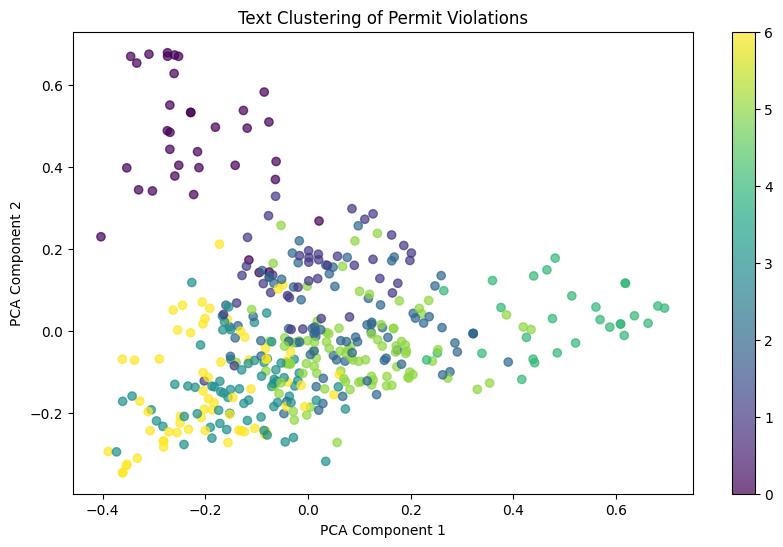


Cluster 0:
Fire Protection Systems
Inspection of Chimneys
Fire Alarm & Detection Systems
Fire Alarm and Detection
Smoke Decetors
Fire Blocking Required
Fire Separation
Modification fire protection
Fire Extinguishers
Fire and Smoke Protection
Smoke Alarms
Automatic Smoke Detection
Horozontal assemblies;Fire
Fire Stop System
Fire-resistance rating
Smoke Detectors
Fire Resistance; Rated Walls
Fire Walls
Portable fire extinguishers
Fire  & Smoke Alarm Systems
Monitoring Fire Alarm Systems
Portable Fire Extinguishers
Fire Separation Assemblies
Fire Alarm Systems
Carbon monoxide alarms
Fire Wall/Fire Resistance
Fire Alarm Ent. Response
Smoke alarm locations
Maintenance/Fire Protection
Fire Warning Systems
Carbon Monoxide Protection
Fire Escape Affidavit
Fire Alarm & Detection
Fire Partitions
Carbon Monoxide Detectors

Cluster 1:
Pull & Junction Boxes
Conductors Considered Outside the Building. Conductors shall be considered outside of a building or other structure under any of the following

In [9]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Your array of values


# Remove NaN values
text_data = clustering_data[~pd.isna(clustering_data)]

# Load pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text to embeddings
embeddings = model.encode(text_data)

# Choose number of clusters (experiment with this)
num_clusters = 7

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
clusters = kmeans.fit_predict(embeddings)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title("Text Clustering of Permit Violations")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Print clusters
cluster_dict = {i: [] for i in range(num_clusters)}
for i, label in enumerate(clusters):
    cluster_dict[label].append(text_data[i])

for cluster, items in cluster_dict.items():
    print(f"\nCluster {cluster}:")
    print("\n".join(items))


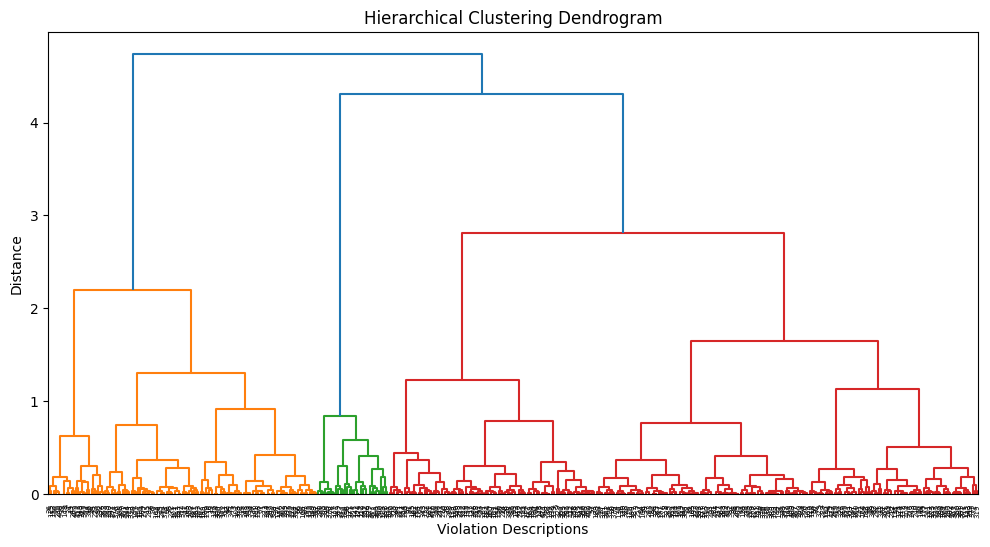


Expected Clusters: 7, Actual Clusters Found: 7
Unique Cluster Labels: [0 1 2 3 4 5 6]

Cluster 0:
- Right of Entry
- Accessible Means of Egress
- Number of Exits or Exit Access
- Party Walls
- Pull & Junction Boxes
- Hangers & Supports
- Minimum Number of Exits
- Exit Passageways
- Underpinning
- Locks and Latches
- Emergency Openings
- Unused openings
- Garages 
- Exit Enclosures
- Street Numbers
- Working Space
- Landings
- Egress Doors
- Exhaust Openings
- Window Wells
- Egress through intervening spaces
- Two exits or exit access doorways.
- General - Stairways
- Adjacent to Excavations
- Masonry Parapets
- Egress thru Intervening Spaces
- Building
- Handrails
- Placement of Backfill
- Storage and Placement-material
- Corridor Continuity
- Int. Exit  Stairways & Ramps
- Foyer & Lobbies
- Exits Maintained
- Projections into Clear Width.
- Door operations-Egress doors
- Bathrooms
- Separated Occupancies
- Exits
- Retaining Wall
- Door Hardware
- Door Operations
- Exit Signs
- Manner

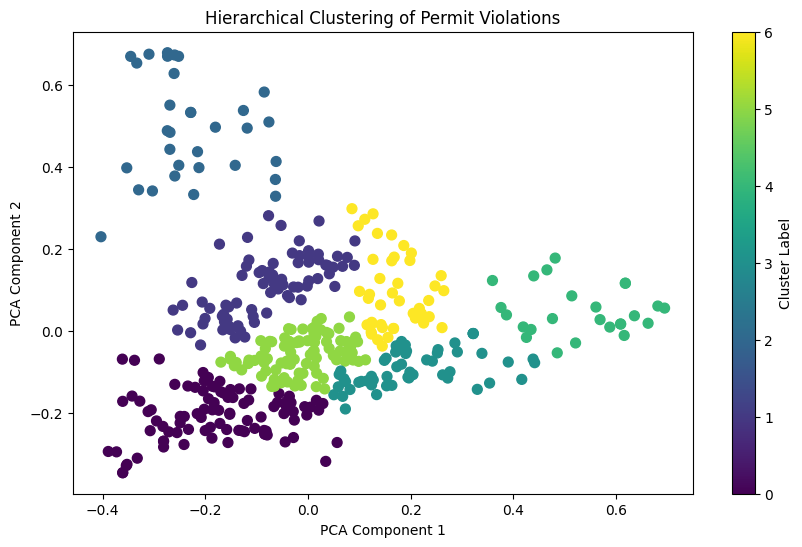

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the violations dataset (Ensure NaN values are removed)
violation_descriptions = clustering_data
violation_descriptions = np.array([desc for desc in violation_descriptions if isinstance(desc, str)])  # Remove NaNs

# 1. Convert Text to Features using TF-IDF
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert text to embeddings
embeddings = model.encode(violation_descriptions)

# 2. Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

# 3. Generate Dendrogram to Determine Clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Violation Descriptions")
plt.ylabel("Distance")
plt.show()

num_clusters = 7  # Modify based on dendrogram
hc = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
labels = hc.fit_predict(X_pca)

# Debugging Step: Check Unique Labels
unique_labels = np.unique(labels)
print(f"\nExpected Clusters: {num_clusters}, Actual Clusters Found: {len(unique_labels)}")
print(f"Unique Cluster Labels: {unique_labels}")

# 5. Print Clusters
cluster_dict = {i: [] for i in unique_labels}  # Ensure we only consider actual formed clusters

for i, label in enumerate(labels):
    cluster_dict[label].append(violation_descriptions[i])

for cluster, items in cluster_dict.items():
    print(f"\nCluster {cluster}:")
    for item in items:
        print(f"- {item}")
# 5. Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering of Permit Violations")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

### We used K-means clustering and Hierarchical based clustering to figure out how to group the 419 different types of violation descriptions into 7 groups. Our idea with this dataset is to figure out hotspots in the city to see which areas tend to have violations of a specific type. The clustering here is not perfect, so we are stil trying to figure out how to do it perfectly. Our idea is to use sparse embeddings too, this might be better seeing that the descriptions are just short sentences.

### Hierarchical clustering definitely does better than K-Means